In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import xlrd
import os

## S3 Files

In [7]:
observation_path = 'Yarwun/phd_model_output.csv'

In [8]:
syscad_input_path = 'Yarwun/test_syscad_input.csv'

In [9]:
syscad_output_path = 'Syscad/Profile and Archive files/Agglomeration_new.csv'

In [49]:
def read_date(date):
    # need to use this function to convert from Excel serial date to python datetime
    return xlrd.xldate.xldate_as_datetime(date, 0)

def auto(x):
    """
    Rewrite of Hugh Durrant-Whyte 5-Jan-94
    Computes autocorrelation of input data set. N is the number of 
    data points, x is a column matrix holding the input data set.
    Uses fft method as advertised in Maybeck p193.
    """

    # first find the size of input vector
    N = np.max(x.shape)
    M = int(round(N/2))

    # then compute PSD of data 
    X = np.fft.fft(x)
    # .* is element-wise multiplication
    Pxx = X * (np.conj(X)/N)

    # then inverse is autocorrelation
    Rxx = np.real(np.fft.ifft(Pxx))
    Rxx = Rxx[0:M]
    fact = Rxx[0]
    Rxx = Rxx/fact
                 
    return(Rxx)


def diff_rem_nan_auto(a,b):
    t = np.array(a-b)
    t = t[~np.isnan(t)]
    a = auto(t)
    return(a)


---

In [10]:
obs_df = pd.read_csv(observation_path).rename(columns=str.lower)

In [13]:
allistair_df = (pd.read_csv(syscad_output_path, dtype={'ElapsedHMS':float})
                .rename(columns = str.lower)
                .assign(elapsedhms = lambda x: pd.to_datetime(x['elapsedhms']
                                                            .apply(read_date),
                                                            infer_datetime_format = False,
                                                            dayfirst=False))
                .sort_values(by='elapsedhms', ascending=True)
            )

In [15]:
input_df = pd.read_csv(syscad_input_path)

---

Since the input dataframe and observation dataframe has time elapsed in seconds, we can create a column in the simulations results to enable easier joins.

In [16]:
allistair_df["time (s)"] = ((allistair_df["reco"] - 1) * (600))

In [17]:
allistair_df["elapsedhms"].diff().dt.seconds.unique()

array([ nan, 599., 600.])

---

In [18]:
merged_df = pd.merge(obs_df, 
          allistair_df,
          on="time (s)")

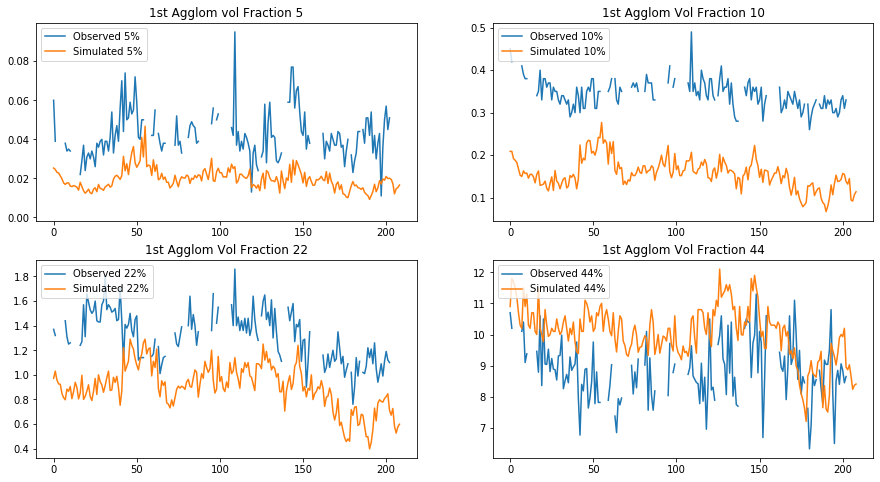

In [19]:
fig, ax  = plt.subplots(2,2, figsize = (15,8))

ax[0,0].set_title("1st Agglom vol Fraction 5")
ax[0,0].plot(merged_df["p_084.qi.sz.5um.al[oh]3(s) (%)"], label = "Observed 5%")
ax[0,0].plot(merged_df["420_s2-1stagg-aps-005la5"], label = "Simulated 5%")
ax[0,0].legend(loc="upper left")

ax[0,1].set_title("1st Agglom Vol Fraction 10")
ax[0,1].plot(merged_df["p_084.qi.sz.10um.al[oh]3(s) (%)"], label = "Observed 10%")
ax[0,1].plot(merged_df["420_s2-1stagg-aps-010la5"], label = "Simulated 10%")
ax[0,1].legend(loc="upper left")

ax[1,0].set_title("1st Agglom Vol Fraction 22")
ax[1,0].plot(merged_df["p_084.qi.sz.20um.al[oh]3(s) (%)"], label = "Observed 22%")
ax[1,0].plot(merged_df["420_s2-1stagg-aps-022la5"], label = "Simulated 22%")
ax[1,0].legend(loc="upper left")

ax[1,1].set_title("1st Agglom Vol Fraction 44")
ax[1,1].plot(merged_df["p_084.qi.sz.45um.al[oh]3(s) (%)"], label = "Observed 44%")
ax[1,1].plot(merged_df["420_s2-1stagg-aps-044la5"], label = "Simulated 44%")
ax[1,1].legend(loc="upper left")

plt.show()

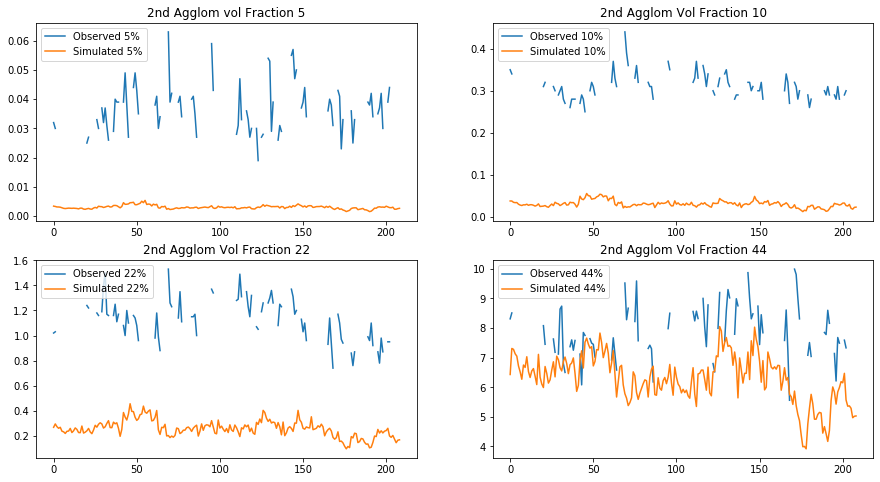

In [20]:
fig, ax  = plt.subplots(2,2, figsize = (15,8))

ax[0,0].set_title("2nd Agglom vol Fraction 5")
ax[0,0].plot(merged_df["p_081.qo.sz.5um.al[oh]3(s) (%)"], label = "Observed 5%")
ax[0,0].plot(merged_df["420_s2-lstagg-aps-005la5"], label = "Simulated 5%")
ax[0,0].legend(loc="upper left")

ax[0,1].set_title("2nd Agglom Vol Fraction 10")
ax[0,1].plot(merged_df["p_081.qo.sz.10um.al[oh]3(s) (%)"], label = "Observed 10%")
ax[0,1].plot(merged_df["420_s2-lstagg-aps-010la5"], label = "Simulated 10%")
ax[0,1].legend(loc="upper left")

ax[1,0].set_title("2nd Agglom Vol Fraction 22")
ax[1,0].plot(merged_df["p_081.qo.sz.20um.al[oh]3(s) (%)"], label = "Observed 22%")
ax[1,0].plot(merged_df["420_s2-lstagg-aps-022la5"], label = "Simulated 22%")
ax[1,0].legend(loc="upper left")

ax[1,1].set_title("2nd Agglom Vol Fraction 44")
ax[1,1].plot(merged_df["p_081.qo.sz.45um.al[oh]3(s) (%)"], label = "Observed 44%")
ax[1,1].plot(merged_df["420_s2-lstagg-aps-044la5"], label = "Simulated 44%")
ax[1,1].legend(loc="upper left")

plt.show()

## Innovations

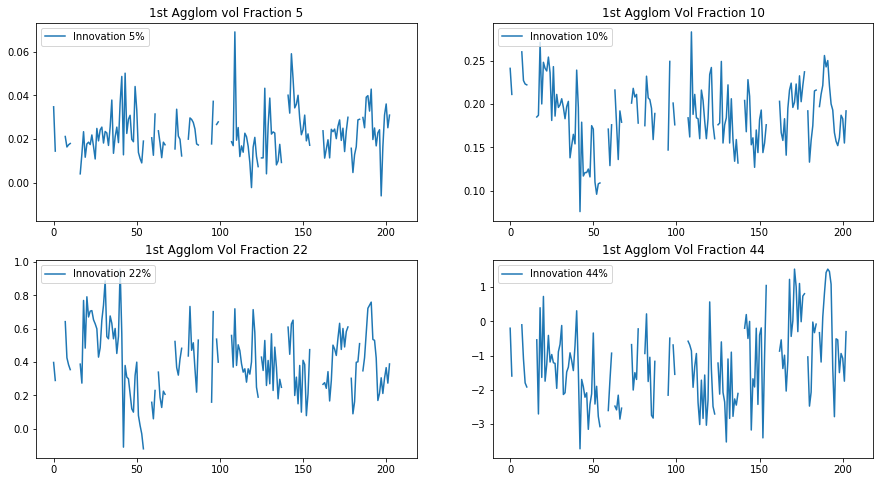

In [22]:
fig, ax  = plt.subplots(2,2, figsize = (15,8))

ax[0,0].set_title("1st Agglom vol Fraction 5")
ax[0,0].plot(merged_df["p_084.qi.sz.5um.al[oh]3(s) (%)"] - merged_df["420_s2-1stagg-aps-005la5"], 
             label = "Innovation 5%")
ax[0,0].legend(loc="upper left")

ax[0,1].set_title("1st Agglom Vol Fraction 10")
ax[0,1].plot(merged_df["p_084.qi.sz.10um.al[oh]3(s) (%)"] - merged_df["420_s2-1stagg-aps-010la5"], 
             label = "Innovation 10%")
ax[0,1].legend(loc="upper left")

ax[1,0].set_title("1st Agglom Vol Fraction 22")
ax[1,0].plot(merged_df["p_084.qi.sz.20um.al[oh]3(s) (%)"] - merged_df["420_s2-1stagg-aps-022la5"],
             label = "Innovation 22%")
ax[1,0].legend(loc="upper left")

ax[1,1].set_title("1st Agglom Vol Fraction 44")
ax[1,1].plot(merged_df["p_084.qi.sz.45um.al[oh]3(s) (%)"] - merged_df["420_s2-1stagg-aps-044la5"], 
             label = "Innovation 44%")
ax[1,1].legend(loc="upper left")

plt.show()

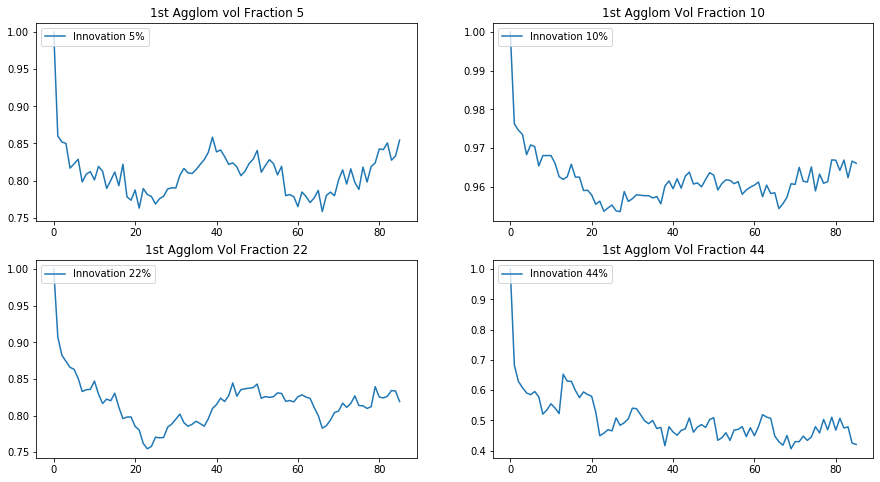

In [51]:
fig, ax  = plt.subplots(2,2, figsize = (15,8))

ax[0,0].set_title("1st Agglom vol Fraction 5")
ax[0,0].plot(diff_rem_nan_auto(merged_df["p_084.qi.sz.5um.al[oh]3(s) (%)"],
                          merged_df["420_s2-1stagg-aps-005la5"]), 
             label = "Innovation 5%")
ax[0,0].legend(loc="upper left")

ax[0,1].set_title("1st Agglom Vol Fraction 10")
ax[0,1].plot(diff_rem_nan_auto(merged_df["p_084.qi.sz.10um.al[oh]3(s) (%)"],
                          merged_df["420_s2-1stagg-aps-010la5"]), 
             label = "Innovation 10%")
ax[0,1].legend(loc="upper left")

ax[1,0].set_title("1st Agglom Vol Fraction 22")
ax[1,0].plot(diff_rem_nan_auto(merged_df["p_084.qi.sz.20um.al[oh]3(s) (%)"],
                          merged_df["420_s2-1stagg-aps-022la5"]),
             label = "Innovation 22%")
ax[1,0].legend(loc="upper left")

ax[1,1].set_title("1st Agglom Vol Fraction 44")
ax[1,1].plot(diff_rem_nan_auto(merged_df["p_084.qi.sz.45um.al[oh]3(s) (%)"],
                          merged_df["420_s2-1stagg-aps-044la5"]), 
             label = "Innovation 44%")
ax[1,1].legend(loc="upper left")

plt.show()

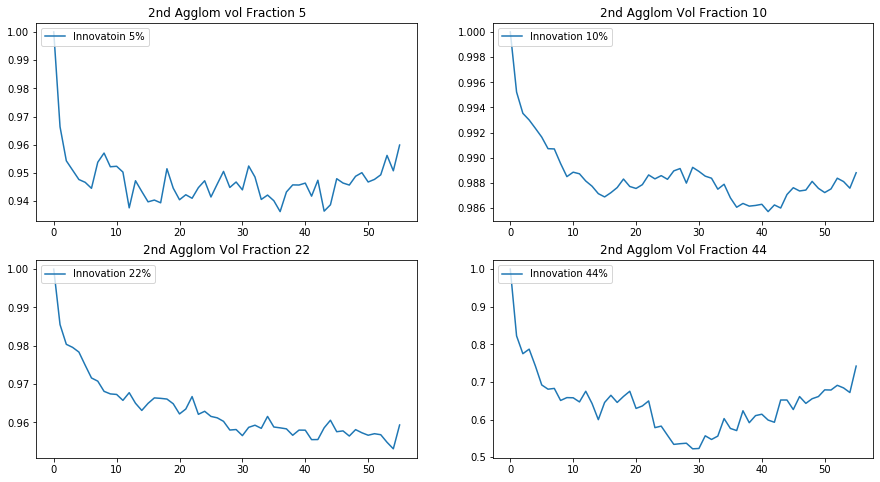

In [52]:
fig, ax  = plt.subplots(2,2, figsize = (15,8))

ax[0,0].set_title("2nd Agglom vol Fraction 5")
ax[0,0].plot(diff_rem_nan_auto(merged_df["p_081.qo.sz.5um.al[oh]3(s) (%)"],
                               merged_df["420_s2-lstagg-aps-005la5"]),
             label = "Innovatoin 5%")
ax[0,0].legend(loc="upper left")

ax[0,1].set_title("2nd Agglom Vol Fraction 10")
ax[0,1].plot(diff_rem_nan_auto(merged_df["p_081.qo.sz.10um.al[oh]3(s) (%)"],
                               merged_df["420_s2-lstagg-aps-010la5"]), 
             label = "Innovation 10%")
ax[0,1].legend(loc="upper left")

ax[1,0].set_title("2nd Agglom Vol Fraction 22")
ax[1,0].plot(diff_rem_nan_auto(merged_df["p_081.qo.sz.20um.al[oh]3(s) (%)"],
                               merged_df["420_s2-lstagg-aps-022la5"]), 
             label = "Innovation 22%")
ax[1,0].legend(loc="upper left")

ax[1,1].set_title("2nd Agglom Vol Fraction 44")
ax[1,1].plot(diff_rem_nan_auto(merged_df["p_081.qo.sz.45um.al[oh]3(s) (%)"],
                               merged_df["420_s2-lstagg-aps-044la5"]),
             label = "Innovation 44%")
ax[1,1].legend(loc="upper left")

plt.show()